# SMS Spam Collection
This is a text corpus of over 5,500 English SMS messages with ~13% labeled as spam. The text file contains one message per line with two columns: the label ("ham" or "spam") and the raw text of the message. Messages labeled as "ham" are non-spam messages that can be considered legitimate. 


[Source](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) of dataset. This corpus was created by  [Tiago A. Almeida](https://www.servidores.ufscar.br/talmeida/) and José María Gómez Hidalgo.

**Citations**: 

- Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results.  Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011. 

- Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. On the Validity of a New SMS Spam Collection.  Proceedings of the 11th IEEE International Conference on Machine Learning and Applications (ICMLA'12), Boca Raton, FL, USA, 2012. 

- Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P.  Towards SMS Spam Filtering: Results under a New Dataset.   International Journal of Information Security Science (IJISS), 2(1), 1-18, 2013. 

## Prompt provided by DataCamp:

You work for a telecom company that is launching a new messaging app. Unfortunately, previous spam filters that they have used are out of date and no longer effective. They have asked you whether you can use new data they have supplied to distinguish between spam and regular messages accurately. They have also told you that it is essential that regular messages are rarely, if ever, categorized as spam.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

# Beginning of own work (created by Evie England)

In this document, I'm going to demonstrate how a spam filter is developed using natural language processing (NLP).

Natural Language Processing (NLP) is a subfield of AI that focuses on enabling computers to understand, interpret, and generate human language. NLP involves the development of algorithms and models that facilitate communication between computers and humans through text or speech. For this project, we want to use NLP to teach computers to distinguish between legitimate (ham) messages and non-legitimate (spam) messages.

As explained above, I have been given a dataset with a mix of ham messages and spam messages. I have been tasked with using this dataset to develop a new spam filter.

Here is a sample of the first 50 messages from the dataset, along with their message type:

In [1]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection.csv", header=None)

df[:50]

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


A quick read of this table shows clear differences between ham vs. spam messages. However, it would be good to visualise the content to gain an overview of the different words used between the two. I'm going to use word clouds to achieve this.

For this, i'm going to first clean my data, removing punctutation and stop words (e.g. I, and, the). After this, we can use word clouds to visualise the most commonly used words in each dataset.

In [3]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


nltk.download('punkt')
nltk.download('stopwords')

def cleanDf(dl, column,joined=False):
    #loads the the specified dataset and performs data cleaning
    #on a specificed column in the dataset

    dl = dl.dropna(subset=[column])
    dl[column]= dl[column].values.astype(str)

    dl[column] =  dl[column].str.lower().str.replace('[{}]'.format(string.punctuation), '',regex=True)
    dl[column] =  dl[column].apply(nltk.word_tokenize)
    stop_words = set(stopwords.words('english'))
    dl[column] =  dl[column].apply(lambda x: [word for word in x if word not in stop_words])
    if joined==True:
        dl[column] = dl[column].apply(' '.join)
        return dl
    else:
        return dl
    

def wordFreq(dl, column):
    dl = cleanDf(dl, column)
    word_freq = Counter()
    dl[column].apply(lambda x: word_freq.update(x))
    return word_freq

def freqWordCloud(dl):
    wordcloud = WordCloud(width = 800, height = 600, background_color ='white', min_font_size =         10).generate_from_frequencies(dl)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    wordcloud.to_file("wordcloud.png")

def makeWordcloud(dl, author=False):
    wordFreqDf = wordFreq(dl, 1)
    return freqWordCloud(wordFreqDf)

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Word Clouds for dataset 1

The following shows a word cloud for ham vs. spam texts.

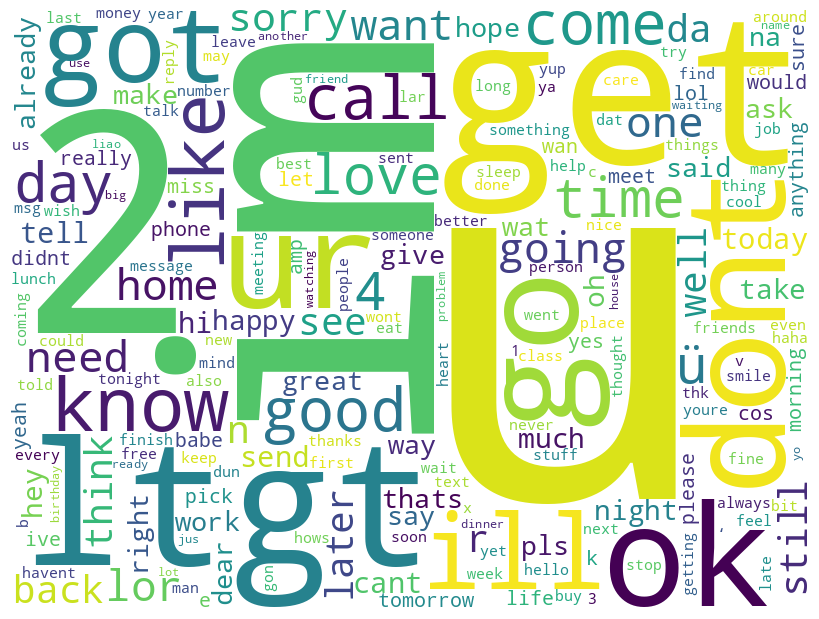

In [4]:
ham_df = df.where(df[0] == 'ham').dropna()
makeWordcloud(ham_df)

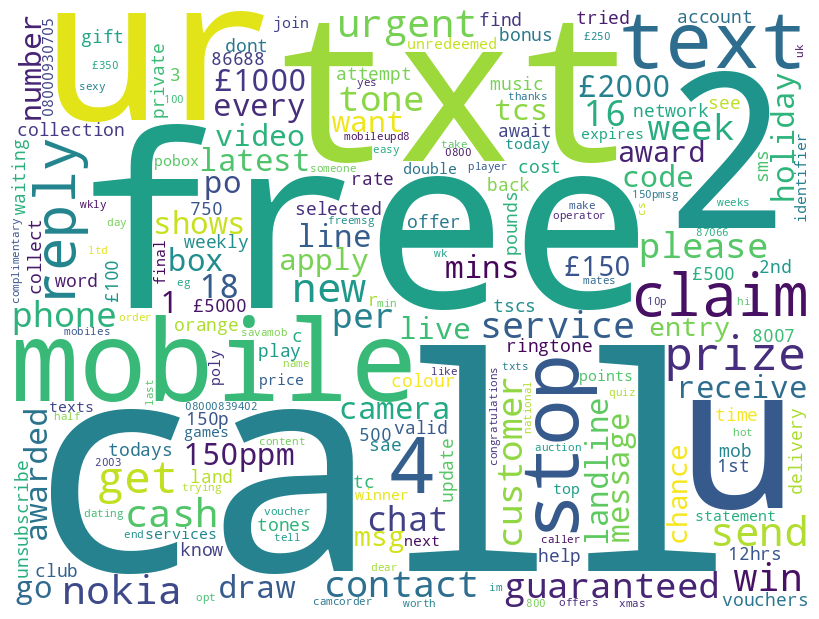

In [5]:
spam_df = df.where(df[0] == 'spam').dropna()
makeWordcloud(spam_df)

There are some clear differences between the words used in spam versus ham messages. With a quick look at the word clouds, I'm sure that you can distinguish which is which!

However, computers don't possess the intuition that we as human beings just used to distinguish the two. Luckily, because our existing data has been labelled as spam or ham via human input, we can use this information to train the computer to differentiate between ham and spam messages. 

This training can then be used to make predictions on the message type of new messages. 

## Spam filter development

Through programming in Python, I applied the afformentioned natural language processing and developed the spam filter. I will explain the process that was followed:

1. Firstly, the text messages were cleaned, removing stop words and punctation.

2. Next, the data was vectorised using a Term Frequency-Inverse Document Frequency (TF-IDF) vectoriser. In essence, the vectoriser analysed the text message data to identify all the unique words present in the messages, and built a vocabulary. As well as this, it also calculated the frequency of each word present in the messages. After this, the text data was transformed into numerical representations which can be used for machine learning.

3. The now transformed data was then split into training and testing datasets. The training dataset consisted of the messages which were used to train the computer on differences between ham vs. spam messages. The testing dataset consisted of messages which were used to find out how effective this training was.

4. Next, the training dataset was used to 'teach' the spam filter what a ham vs. spam message looks like. To achieve this, Multinomial Naive Bayes Classifier was used. This is a machine learning algorithm which calculates the probability that a given document belongs to a specific class, based on word frequencies. In this case, it calculated the probability of observing a specific word given that a message is ham or spam.

5. The now trained spam filter was then used to make predictions on the classification of each message in the test dataset. I.e. it  predicted a classification (ham or spam) based on the highest probability of which class it belongs to.
  
6. Reports on the accuracy of these predictions was returned.


Below is a snippet of the code that was used to achieve this. 

In [6]:
"""
#1. creating a new dataframe with cleaned data
new_df = cleanDf(df,1,joined=True)

#2. initialising and fitting the vectoriser to the text message data
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(new_df[1])

#3. splitting the dataframe into testing and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, new_df[0], test_size=0.2, random_state=42)

#4. initialising the Multinomial Naive Bayes classifier and fitting the training dataset
spam_filter = MultinomialNB()
spam_filter.fit(X_train, y_train)

#5. using the trained algorithm to make predictions on the classfications of messages in the dataset
y_pred = spam_filter.predict(X_test)
"""

'\n#1. creating a new dataframe with cleaned data\nnew_df = cleanDf(df,1,joined=True)\n\n#2. initialising and fitting the vectoriser to the text message data\ntfidf_vectorizer = TfidfVectorizer()\nX = tfidf_vectorizer.fit_transform(new_df[1])\n\n#3. splitting the dataframe into testing and training datasets\nX_train, X_test, y_train, y_test = train_test_split(X, new_df[0], test_size=0.2, random_state=42)\n\n#4. initialising the Multinomial Naive Bayes classifier and fitting the training dataset\nspam_filter = MultinomialNB()\nspam_filter.fit(X_train, y_train)\n\n#5. using the trained algorithm to make predictions on the classfications of messages in the dataset\ny_pred = spam_filter.predict(X_test)\n'

The table below contains statistics related to the accuracy of the model in classifying messages as spam or ham. Precision measures the accuracy of positive predictions made by the model, whereas recall measures the model's ability to find all postive instances.
High precision tells us that the model is rarely or never incorrectly identifying messages as spam. High recall tells us that the model is almost always or always correctly identifying messages as spam.

Precision and recall are in tension with eachother. As one increases, the other will decrease and vice versa.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

new_df = cleanDf(df,1,joined=True)
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(new_df[1])
X_train, X_test, y_train, y_test = train_test_split(X, new_df[0], test_size=0.2, random_state=42)

spam_filter = MultinomialNB()
spam_filter.fit(X_train, y_train)
y_pred = spam_filter.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score of model: {accuracy:.2f}")

report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report into a DataFrame
r_df = pd.DataFrame(report).T

# Optionally, you can reset the index to include '0' and '1' for class labels
r_df.reset_index(inplace=True)
r_df.rename(columns={'index': 'Class'}, inplace=True)
r_df

Accuracy score of model: 0.97


,Class,precision,recall,f1-score,support
0,ham,0.966000,1.000000,0.982706,966.000000
1,spam,1.000000,0.771812,0.871212,149.000000
2,accuracy,0.969507,0.969507,0.969507,0.969507
3,macro avg,0.983000,0.885906,0.926959,1115.000000
4,weighted avg,0.970543,0.969507,0.967807,1115.000000


In this instance, we can see that achieving a perfect precision score of 1, means that the recall rate is capped at 0.77.

The graph below visualises the trade-off between recall and precision. We can see how as precision increases, recall decreases.

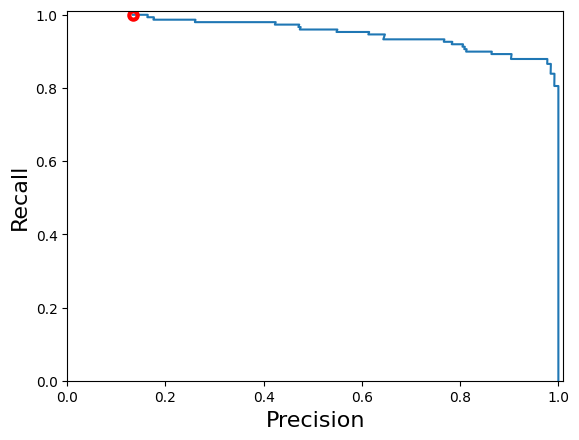

In [9]:
def prec_recall():
    y_scores_sf = spam_filter.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_sf, pos_label='spam')
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, '.', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    #plt.axes().set_aspect('equal')
    plt.show()
    
prec_recall()

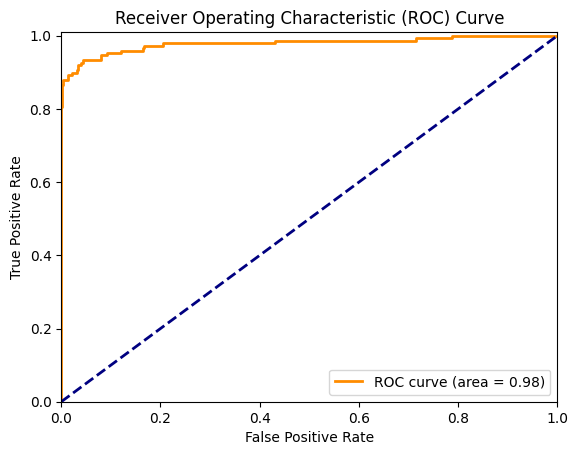

In [15]:
from sklearn.metrics import roc_curve, auc
def roc():
    y_scores_sf = spam_filter.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_sf, pos_label='spam')

    # Step 4: Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    
roc()

We can see from the results above that our machine learning model has a high accuracy of 0.97. This implies that it will categorise new spam and ham messages with a high level of accuracy. Furthermore, our precision figure of 1 for spam indicates that the model never inaccurately labelled a message as spam (false positive). High precision is prioritised in cases like this, where our objective is to minimise false positives.

We don't need to make any adjustments in this case, but if for example we needed a model which rarely produced false negatives, the model would need to be adjusted to prioritise recall.

The confusion matrix below visualises the number of times the model correctly or incorrectly predicted whether a message is spam or not. It compares the actual values, i.e. the correct classifications for each message in the test dataset, to the predicted values, i.e. predictions the model made for the classification of each message. The accompanying image provides further explanation of how a confusion matrix works.

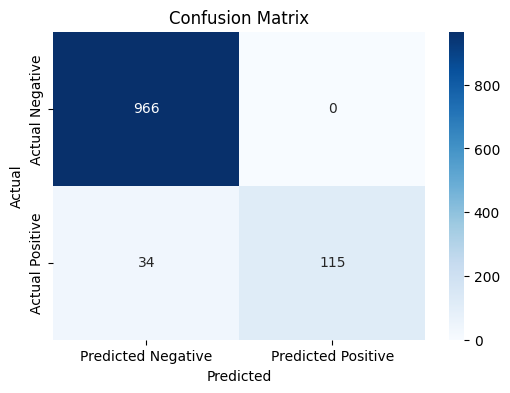

In [8]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
# y_true and y_pred are arrays of 0s (negative class) and 1s (positive class)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def matrix(true,pred):
    cm = confusion_matrix(true, pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative',       'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
matrix(y_test, y_pred)

(TN = True Negative, FP = False Positive, FN = False Negative, TN = True Negative)
![C13314_06_05](C13314_06_05.webp)


In the confusion matrix above, we can see that 115 messages that were predicted to be spam messages, were in fact spam messages (a.k.a. true positive). We can also see that the model never falsely classified a ham message as a spam message (a.k.a. false positive).

Our accuracy figure, precision figure, and confusion matrix, provide indication that the model we created achieves exactly what was asked. It never incorrectly classified legitimate messages as spam.

## Spam filter example message tests

Let's look at an example of the spam filter in action with some new messages. Here, the spam filter is used to make a prediction on the type of message that has been inputted.
The message, along with the prediction, is then returned and presented as an image with text.

Here are two examples of spam messages and their predictions:

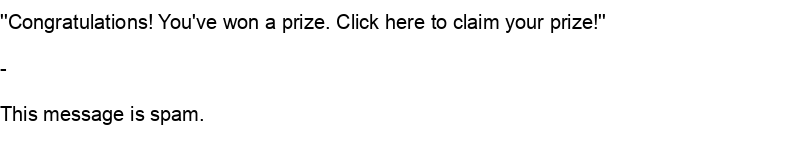

In [27]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display


def msg_type(msg,flter):
    new_message_vector = tfidf_vectorizer.transform([msg])
    # Make a prediction
    return ("This message is %s." % flter.predict(new_message_vector)[0])

messageSpam1 = "Congratulations! You've won a prize. Click here to claim your prize!"
messageSpam2 = "FREE $$! Claim your $10,000 CASH PRIZE now! Just reply with your info."

def createText(msg):
    # Create a new image
    image = Image.new("RGB", (800, 150), "white")
    draw = ImageDraw.Draw(image)
    font = ImageFont.truetype("arial.ttf", 20)

    # Render text with the custom font
    draw.text((0, 10), "''" + msg +"''\n\n-\n\n" + msg_type(msg, spam_filter), fill="black",font=font)
    return display(image)

createText(messageSpam1)

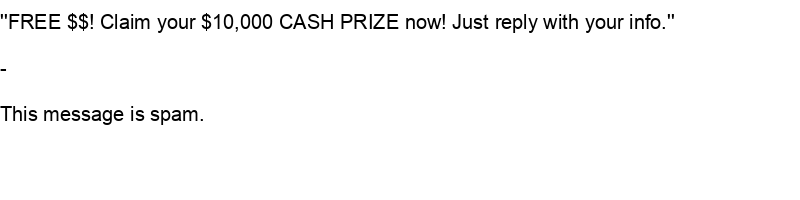

In [10]:
createText(messageSpam2)

Now I want to make sure that legitimate text messages will not be categorised as spam. Here are two examples:

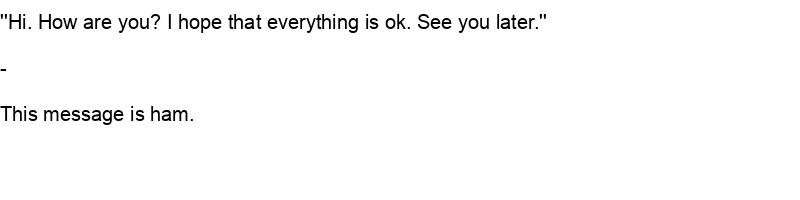

In [11]:
messageHam1 = "Hi. How are you? I hope that everything is ok. See you later."
messageHam2 = "I'm going to the shop now, text me if you want anything."
createText(messageHam1)

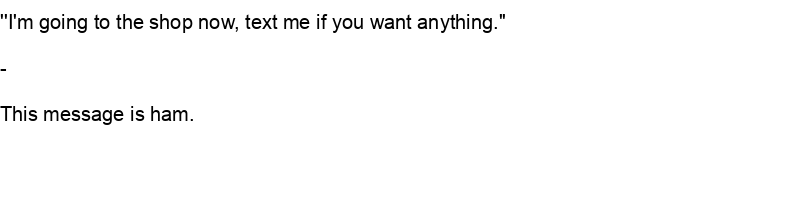

In [12]:
createText(messageHam2)

These examples demonstrate the effectiveness of the newly created model as a spam filter. However, we don't know how well the model will perform with new and diverse data. The examples above are a good start, but it would be good to test the model with a different large dataset of spam and ham messages.


## Testing the spam filter with a new dataset

I obtained a new publicly available dataset of 5971 messages labelled as, ham, spam or smshing. Smshing messages are SMS phishing messages. Phishing messages often look similar to spam messages, and we would also need to prevent them from reaching users.
Therefore, I decided to relabel them as spam and include them in the new dataset.

(Reference for dataset: mishra, sandhya; Soni, Devpriya (2022), “SMS PHISHING DATASET FOR MACHINE LEARNING AND PATTERN RECOGNITION”, Mendeley Data, V1, doi: 10.17632/f45bkkt8pr.1)

Below is a sample of the first 50 messages.

In [23]:
df_2 = pd.read_csv("Dataset_5971.csv")

df_2 = df_2[['LABEL', 'TEXT']]

df_2['LABEL'] = df_2['LABEL'].replace('Smishing', 'spam')
df_2['LABEL'] = df_2['LABEL'].replace('smishing', 'spam')
df_2['LABEL'] = df_2['LABEL'].replace('Spam', 'spam')
df_2[:50]

,LABEL,TEXT
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,spam,Please Stay At Home. To encourage the notion o...
5,spam,BankOfAmerica Alert 137943. Please follow http...
6,ham,Sorry dude. Dont know how i forgot. Even after...
7,ham,I don't quite know what to do. I still can't g...
8,ham,Ok lor. Anyway i thk we cant get tickets now c...
9,ham,Wat r u doing now?


Once again, you can clearly distinguish between ham vs. spam messages.  

To test the effectiveness of our existing spam filter in predicting if these are ham vs. spam messages, we are going to apply a similar process that was used before. This invovles cleaning and pre-proccesing our new text messages, then using our existing spam filter to predict the ham or spam label of each message.


In [24]:
def evaluate_spam_filter(df, matrix_show=False):
    # Clean the DataFrame
    new_df = cleanDf(df, 'TEXT', joined=True)
    
    # Transform the text data using the TF-IDF vectorizer
    X = tfidf_vectorizer.transform(new_df['TEXT'])
    
    # Predict using the spam filter model
    y_pred = spam_filter.predict(X)
    
    # Get the true labels from the DataFrame
    y_true = new_df['LABEL']
    
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    # Generate the classification report
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Convert the report into a DataFrame
    report_df = pd.DataFrame(report).T
    if matrix_show==True:
        return matrix(y_true, y_pred)
    else:
        print(f"Accuracy score of model: {accuracy:.2f}")
        return report_df

evaluate_spam_filter(df_2)

Accuracy score of model: 0.94


,precision,recall,f1-score,support
ham,0.932256,1.000000,0.964940,4844.000000
spam,1.000000,0.687666,0.814932,1127.000000
accuracy,0.941048,0.941048,0.941048,0.941048
macro avg,0.966128,0.843833,0.889936,5971.000000
weighted avg,0.945042,0.941048,0.936627,5971.000000


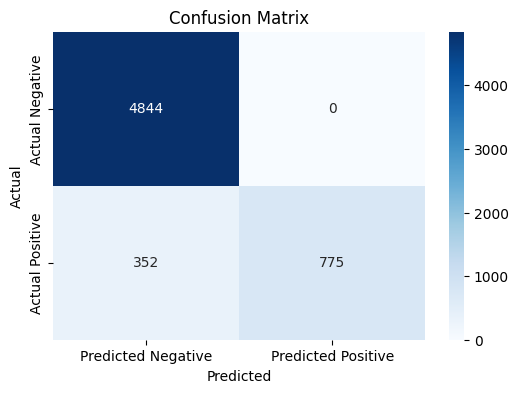

In [25]:
evaluate_spam_filter(df_2,matrix_show=True)

This time we have an accuracy score of .94. The accuracy is slightly lower than with the original dataset, however it is still within an acceptable range. As well as this, the confusion matrix shows that the filter is producing 0 false positives with this dataset. Again, no ham messages are being incorrectly classified by the predictions.

From this additional testing, futher evidence has been provided to show that the spam filter achieves what was asked. It never falsely categorises ham as spam.

## Conclusion

In this document, we looked at a basic example of how machine learning techniques would be applied to develop a spam filter. We also saw how the effectiveness and accuracy of the spam filter can be assessed.

To implement it into the messaging app, the filter would be used in real-time as each message arrives. To test it's effectiveness within the app, A/B testing might be applied, with the new filter being rolled out to one group of users (group A), while another group keeps the old filter (group B). The effectiveness of the two filters might then be compared based on user feedback and predefined metrics.

Thank you for reading.

